# Predicting Chocolate Ratings
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.
This project is dedicated to predicting chocolate ratings.

These ratings were compiled by Brady Brelinski, Founding Member of the Manhattan Chocolate Society.

# Cleaning & Exploratory Data Analysis

In [1]:
###Import and inspect the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/holliknight/Desktop/flavors_of_cacao-1.csv')
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [2]:
df.columns = ['Company', 'SpecificBeanOrigin', 'REF', 'ReviewDate', 'CocoaPct', 'Location', 'Rating', 'BeanType', 'BroadBeanOrigin']

In [3]:
##We can drop the REF column because it is redundant: it is value linked to when the review was entered in the database. Higher = more recent.
df = df.drop(columns=['REF'])
df.head()

,Company,SpecificBeanOrigin,ReviewDate,CocoaPct,Location,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,2015,70%,France,3.50,,Peru


In [4]:
##Since we will be using Rating as our target variable, it will need to be converted from a float to an integer.
##We will also need to modify the data type of Cocoa Percent so that we can work with it as a number
df['CocoaPct'] = df['CocoaPct'].str.replace('%','').astype(float)/100
df['Rating'] = (df['Rating']* 100).astype(int)

df.head()


,Company,SpecificBeanOrigin,ReviewDate,CocoaPct,Location,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,2016,0.63,France,375,,Sao Tome
1,A. Morin,Kpime,2015,0.70,France,275,,Togo
2,A. Morin,Atsane,2015,0.70,France,300,,Togo
3,A. Morin,Akata,2015,0.70,France,350,,Togo
4,A. Morin,Quilla,2015,0.70,France,350,,Peru


In [5]:
##Since most of these columns are unspecified data types, they must be converted to categorical if we are to use them for machine learning
df['Company'] = df['Company'].astype('category')
df['SpecificBeanOrigin'] = df['SpecificBeanOrigin'].astype('category')
df['Location'] = df['Location'].astype('category')
df['BeanType'] = df['BeanType'].astype('category')
df['BroadBeanOrigin'] = df['BroadBeanOrigin'].astype('category')
df['CocoaPct'] = df['CocoaPct'].astype('float64')

df.dtypes

Company               category
SpecificBeanOrigin    category
ReviewDate               int64
CocoaPct               float64
Location              category
Rating                   int64
BeanType              category
BroadBeanOrigin       category
dtype: object

In [6]:
#Check for null values
print(df.isnull().sum())

Company               0
SpecificBeanOrigin    0
ReviewDate            0
CocoaPct              0
Location              0
Rating                0
BeanType              1
BroadBeanOrigin       1
dtype: int64


In [7]:
###Since there are only 2 null values, they should not affect the outcome - we'll remove them

df = df.dropna()
print(df.isnull().sum())

Company               0
SpecificBeanOrigin    0
ReviewDate            0
CocoaPct              0
Location              0
Rating                0
BeanType              0
BroadBeanOrigin       0
dtype: int64


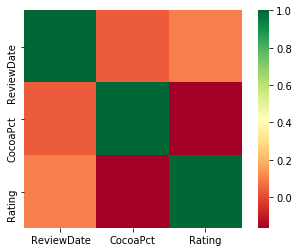

In [8]:
##Any obvious correlations? Doesn't look like it.

import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

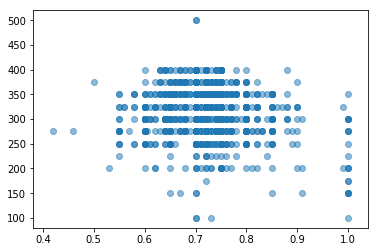

In [9]:
#Let's inspect some variables more closely
plt.scatter(df['CocoaPct'], df['Rating'], alpha=0.5)
plt.xlabel = 'Cocoa Percent'
plt.ylabel = 'Rating'


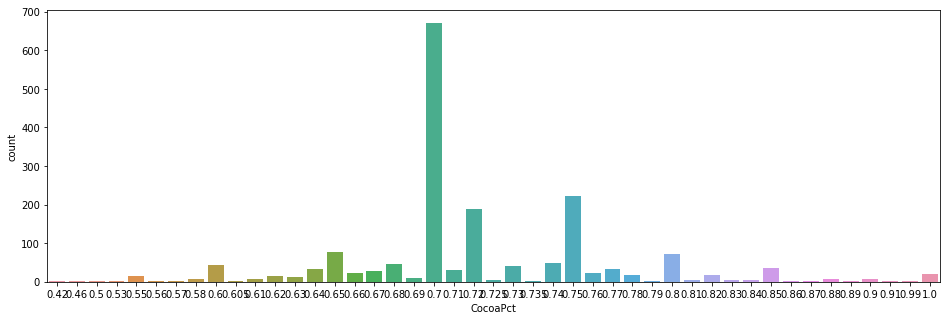

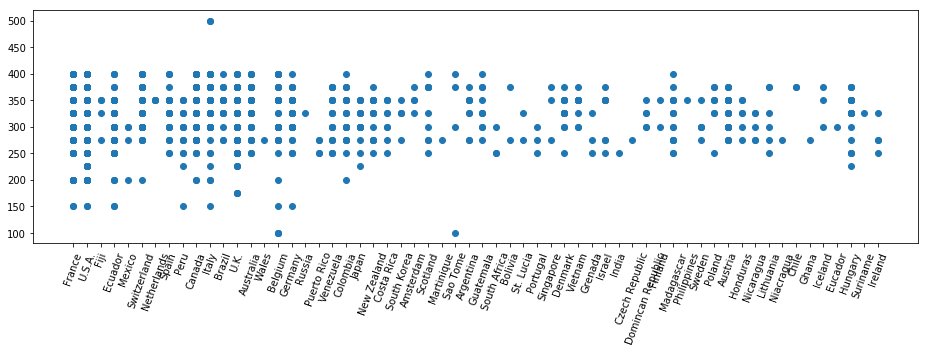

In [10]:
plt.figure(figsize=(16,5))
sns.countplot(x= 'CocoaPct', data = df)

plt.figure(figsize=(13, 5))
plt.scatter(df['Location'], df['Rating'])
plt.xticks(rotation=70)
plt.tight_layout()


(array([  4.,  13.,  32., 140., 259., 644., 602.,  97.,   0.,   2.]),
 array([100., 140., 180., 220., 260., 300., 340., 380., 420., 460., 500.]),
 <a list of 10 Patch objects>)

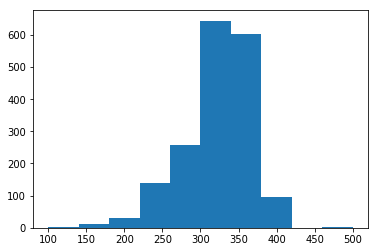

In [11]:
plt.hist(df['Rating'])

In [12]:
###It still doesn't look like we have any obvious correlations, but we do see that the most ratings hover around 3.0-3.5
###We also see that 70% cocao is very popular

# Hypothesis Test, Feature Engineering, & Model Selection

Linear regression would appear to be an ideal model for predicting chocolate ratings since the values are continuous. Since all of the columns in this dataset are independent and there is no multi-collinearity, we will be using all columns to help us in our regression model. 

We will be using dummy variables to transform our text columns into binary categories, then we will be scaling the data in order to bring all features to the same level of magnitudes.

After attempting linear regression, it becomes clear by our R^2 value that the model is quite ineffective. A better method ends up being to transform the target variable into a value that more closely resembles a categorical value. We will then use logistic regression to predict chcolate ratings.

In [13]:
##Let's go ahead and create our dummy variables for future use

df = pd.get_dummies(df, drop_first=True)
df.head()

,ReviewDate,CocoaPct,Rating,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),Company_Alain Ducasse,...,BroadBeanOrigin_Venezuela,"BroadBeanOrigin_Venezuela, Carribean","BroadBeanOrigin_Venezuela, Dom. Rep.","BroadBeanOrigin_Venezuela, Ghana","BroadBeanOrigin_Venezuela, Java","BroadBeanOrigin_Venezuela, Trinidad",BroadBeanOrigin_Venezuela/ Ghana,BroadBeanOrigin_Vietnam,BroadBeanOrigin_West Africa,BroadBeanOrigin_
0,2016,0.63,375,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0.70,275,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0.70,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0.70,350,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,0.70,350,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
###Now let's go ahead and scale our data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

print(scaler.fit(df))
StandardScaler(copy=True, with_mean=True, with_std=True)

print(scaler.mean_)

print(scaler.transform(df))

StandardScaler(copy=True, with_mean=True, with_std=True)
[2.01232627e+03 7.16991076e-01 3.18586168e+02 ... 2.11935304e-02
 3.34634690e-03 4.07138873e-02]
[[ 1.25475435 -1.37540732  1.18135642 ... -0.14714762 -0.05794465
  -0.20601422]
 [ 0.91320667 -0.26864423 -0.9127336  ... -0.14714762 -0.05794465
  -0.20601422]
 [ 0.91320667 -0.26864423 -0.3892111  ... -0.14714762 -0.05794465
  -0.20601422]
 ...
 [-0.45298404 -1.05918929  0.65783391 ... -0.14714762 -0.05794465
  -0.20601422]
 [-0.45298404 -1.53351633  0.13431141 ... -0.14714762 -0.05794465
  -0.20601422]
 [-0.79453171 -1.05918929 -0.3892111  ... -0.14714762 -0.05794465
  -0.20601422]]


# Machine Learning Model Implementation

In [15]:
###Since our target variable is continuous, we will be looking to see if linear regression will be a good model for predicting ratings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df.drop('Rating', axis = 1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=9)

# Create the regressor: reg
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -1.0784805695939278e+21
Root Mean Squared Error: 1572580330553.7583


In [16]:
###This looks to be a terrible model - our R^2 value indicates that our regression line poorly fits the data.
###Another option is to use logisitic regression by using our target variable as a categorical value:

def categorical_rating(rating):
    
    rating = int(rating)
    
    if (rating == 0.0 ):
        return 0.0
    elif (rating > 0 ) and (rating <= 199 ):
        return 1.0
    elif (rating >= 200 ) and (rating <= 299 ):
        return 2.0
    elif (rating >= 300 ) and (rating <= 399 ):
        return 3.0
    else:
        return 4.0

df['Rating'] = df['Rating'].apply(categorical_rating)

In [17]:
# Now let's use logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X = df.drop('Rating', axis = 1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=9)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

69.5859872611465


In [18]:
###This looks to be a much better model.

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         8
        2.0       0.54      0.17      0.26       164
        3.0       0.71      0.95      0.81       430
        4.0       0.50      0.08      0.13        26

avg / total       0.65      0.70      0.63       628



/Users/holliknight/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
# Let's use Hyperparameter tuning with RandomizedSearchCV to inspect our model further
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 7}
Best score is 0.6949247071946458


# Conclusion and further development

Logistic regression yielded an accuracy of nearly 70%, concluding that the features utilized here (Company, SpecificBeanOrigin, ReviewDate, CocoaPct, Location, Rating, BeanType, and BroadBeanOrigin) are strong indicators for chocolate rating. I would have expected the linear regression model to have worked better, but transforming the ratings into categorical values and using logistic regression ended up providing a stronger model.

The real world applications of this model, at least at this stage, are minimal; however, if it were to be honed further, it could be very useful for comanies who produce and sell chocolate.

I did not expect these features to have such a strong impact on predicting scores, especially when taken together. In the future, I would like to have more time to dissect each feature as I grow my Python skills. While I don't plan on investing in chocolate any time soon, I will be returning to this dataset as a way to hone my Python abilities.